# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [3]:
# Checking cities list
cities

['grytviken',
 'moussoro',
 'port-aux-francais',
 'edinburgh of the seven seas',
 'zhalantun',
 'puerto natales',
 'tiksi',
 'iqaluit',
 'fort bragg',
 'thompson',
 'ushuaia',
 'baiyin',
 'adamstown',
 'olonkinbyen',
 'tuy hoa',
 'codrington',
 'avarua',
 'shizuishan',
 'kodinsk',
 'tomatlan',
 'port elizabeth',
 "nar'yan-mar",
 'akureyri',
 'minas de marcona',
 'georgetown',
 'enewetak',
 'blackmans bay',
 'waitangi',
 'petropavlovsk-kamchatsky',
 'iskateley',
 'shangqiu',
 'bethel',
 'yellowknife',
 'happy valley-goose bay',
 'santa ana de yacuma',
 'prince george',
 'hithadhoo',
 'lushun',
 'hamilton',
 'lebu',
 'cide',
 'brisas de zicatela',
 'dakhla',
 'portland',
 'masterton',
 'stanley',
 'igarka',
 'selfoss',
 'ribeira grande',
 'uturoa',
 'ancud',
 'albany',
 'flying fish cove',
 'saudarkrokur',
 'ishigaki',
 'nemuro',
 'auki',
 'kavaratti',
 'marsa alam',
 'port douglas',
 'vilyuchinsk',
 'bilibino',
 'sinabang',
 'edd',
 'saldanha',
 'yarmouth',
 'tevragh zeina',
 'westport'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | moussoro
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | zhalantun
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | baiyin
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | tuy hoa
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | shizuishan
Processing Record 19 of Set 1 | kodinsk
Processing Record 20 of Set 1 | tomatlan
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | nar'yan-mar
Pro

Processing Record 40 of Set 4 | martapura
Processing Record 41 of Set 4 | choibalsan
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | valparaiso
Processing Record 45 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 46 of Set 4 | alta
Processing Record 47 of Set 4 | nova sintra
Processing Record 48 of Set 4 | pudozh
Processing Record 49 of Set 4 | caibarien
Processing Record 0 of Set 5 | wailua homesteads
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | piti village
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | richards bay
Processing Record 6 of Set 5 | griffith
Processing Record 7 of Set 5 | la'ie
Processing Record 8 of Set 5 | saratamata
City not found. Skipping...
Processing Record 9 of Set 5 | imola
Processing Record 10 of Set 5 | tual
Processing Record 11 of Set 5 | zahedan
Processing Record 12 of Set 5 | jayapura
Proc

Processing Record 30 of Set 8 | madang
Processing Record 31 of Set 8 | maragogi
Processing Record 32 of Set 8 | xai-xai
Processing Record 33 of Set 8 | znamenskoye
Processing Record 34 of Set 8 | hayma'
City not found. Skipping...
Processing Record 35 of Set 8 | wajir
Processing Record 36 of Set 8 | ca mau
Processing Record 37 of Set 8 | mana
Processing Record 38 of Set 8 | mamfe
Processing Record 39 of Set 8 | yayci
City not found. Skipping...
Processing Record 40 of Set 8 | altai
Processing Record 41 of Set 8 | praia da vitoria
Processing Record 42 of Set 8 | kodiak
Processing Record 43 of Set 8 | benguela
Processing Record 44 of Set 8 | north shore
Processing Record 45 of Set 8 | banda aceh
Processing Record 46 of Set 8 | tamanrasset
Processing Record 47 of Set 8 | inyonga
Processing Record 48 of Set 8 | susuman
Processing Record 49 of Set 8 | poronaysk
Processing Record 0 of Set 9 | margate
Processing Record 1 of Set 9 | kencong
Processing Record 2 of Set 9 | majuro
Processing Reco

Processing Record 18 of Set 12 | sur
Processing Record 19 of Set 12 | lima
Processing Record 20 of Set 12 | tome
Processing Record 21 of Set 12 | bel ombre
Processing Record 22 of Set 12 | takamaka
City not found. Skipping...
Processing Record 23 of Set 12 | malkara
Processing Record 24 of Set 12 | ad dilam
Processing Record 25 of Set 12 | bayanhongor
Processing Record 26 of Set 12 | harstad
Processing Record 27 of Set 12 | saipan
Processing Record 28 of Set 12 | san julian
Processing Record 29 of Set 12 | mejit
Processing Record 30 of Set 12 | pavilosta
Processing Record 31 of Set 12 | kresek
Processing Record 32 of Set 12 | tlahualilo de zaragoza
Processing Record 33 of Set 12 | coahuayana de hidalgo
Processing Record 34 of Set 12 | san andres
Processing Record 35 of Set 12 | morondava
Processing Record 36 of Set 12 | sakakah
Processing Record 37 of Set 12 | holmsund
Processing Record 38 of Set 12 | jiazi
Processing Record 39 of Set 12 | cuyo
Processing Record 40 of Set 12 | kristian

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,3.78,98,92,0.79,GS,1696551157
1,moussoro,13.6408,16.4901,34.01,22,68,2.31,TD,1696551157
2,port-aux-francais,-49.3500,70.2167,3.20,87,96,12.70,TF,1696550976
3,edinburgh of the seven seas,-37.0676,-12.3116,11.31,65,91,4.81,SH,1696551158
4,zhalantun,48.0000,122.7167,8.50,58,8,2.40,CN,1696551159


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.78,98,92,0.79,GS,1696551157
1,moussoro,13.6408,16.4901,34.01,22,68,2.31,TD,1696551157
2,port-aux-francais,-49.3500,70.2167,3.20,87,96,12.70,TF,1696550976
3,edinburgh of the seven seas,-37.0676,-12.3116,11.31,65,91,4.81,SH,1696551158
4,zhalantun,48.0000,122.7167,8.50,58,8,2.40,CN,1696551159


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

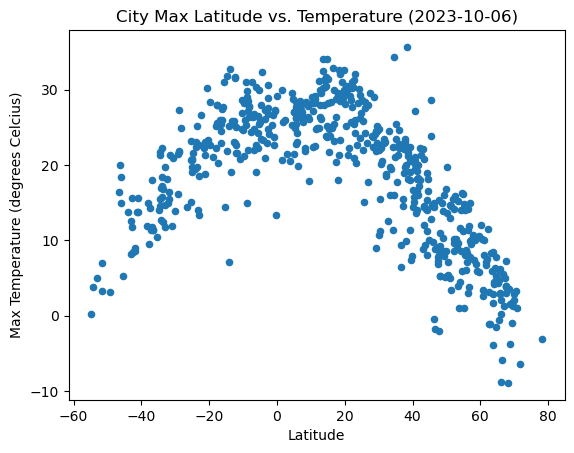

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-10-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (degrees Celcius)")

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

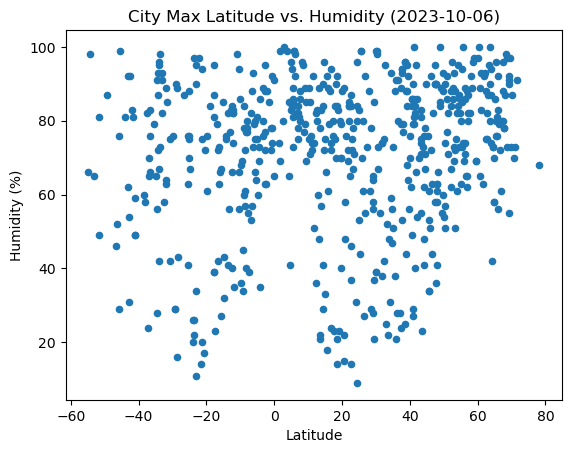

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Humidity")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-10-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

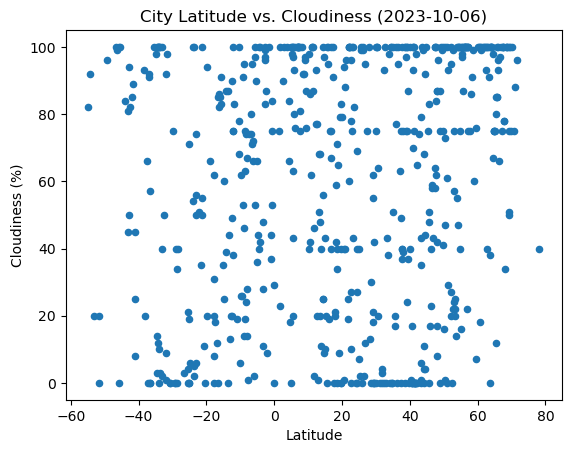

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

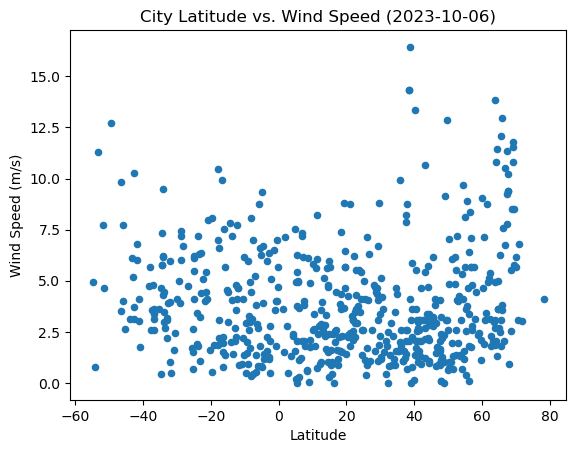

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_sq = rvalue ** 2
    
    return regress_values, line_eq, rvalue

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,moussoro,13.6408,16.4901,34.01,22,68,2.31,TD,1696551157
4,zhalantun,48.0000,122.7167,8.50,58,8,2.40,CN,1696551159
6,tiksi,71.6872,128.8694,-6.42,91,96,3.03,RU,1696551161
7,iqaluit,63.7506,-68.5145,2.85,100,100,13.86,CA,1696551161
8,fort bragg,35.1390,-79.0060,25.46,73,100,1.54,US,1696551162


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.78,98,92,0.79,GS,1696551157
2,port-aux-francais,-49.3500,70.2167,3.20,87,96,12.70,TF,1696550976
3,edinburgh of the seven seas,-37.0676,-12.3116,11.31,65,91,4.81,SH,1696551158
5,puerto natales,-51.7236,-72.4875,3.25,81,20,7.72,CL,1696551160
10,ushuaia,-54.8000,-68.3000,0.24,66,82,4.92,AR,1696551163


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8621619065449989


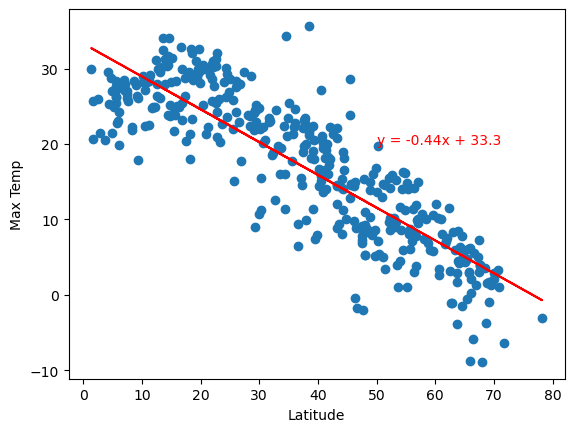

In [16]:
# Linear regression on Northern Hemisphere
regress_values, line_eq, rvalue = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")

The r-value is: 0.7827355290688087


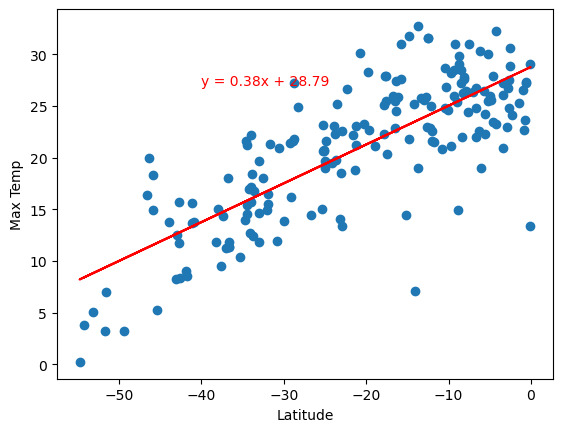

In [17]:
# Linear regression on Southern Hemisphere
regress_values, line_eq, rvalue = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-40, 27), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:**

The relationship between latitude in the northern hemisphere and maximum temperature is strong and negative.
i.e. The higher the latitude value (and hence the closer a city is to the North Pole), the lower the maximum temp.
In addition, the relationship between latitude in the southern hemisphere and maximum temperature is strong and
positive.
i.e. The higher the latitude value (and hence the closer a city is to the Equator), the higher the maximum temp.

This can be attributed to the fact that cities near the Equator (latitude = 0) experience tropical climates due
to Earth's spherical shape and its effects on the distance between the city and the Sun, and also the fact that cities
closer to the North and South Poles tend to experience polar climates for the same reason.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12143727888931855


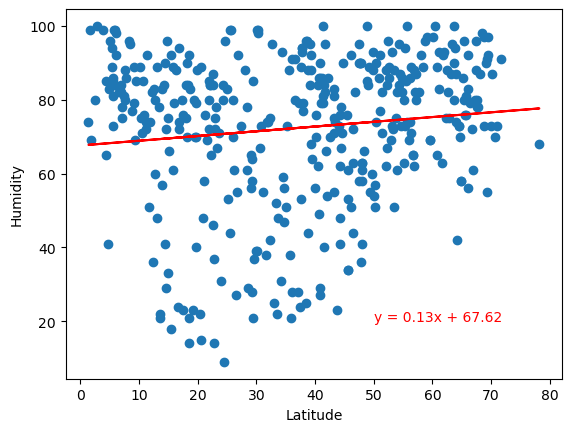

In [18]:
# Northern Hemisphere
regress_values, line_eq, rvalue = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

The r-value is: 0.05901766126584869


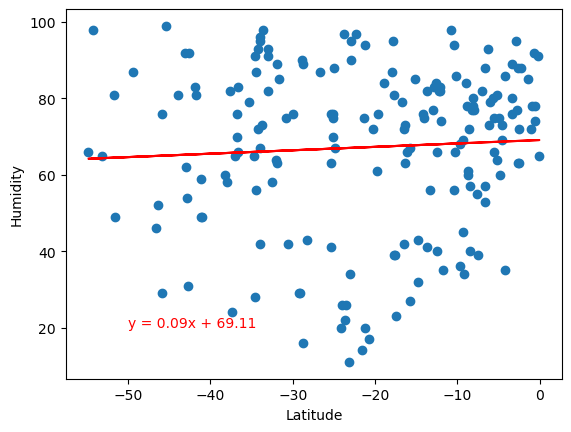

In [19]:
# Southern Hemisphere
regress_values, line_eq, rvalue = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

The relationship between latitude in the northern hemisphere and humidity is very weak and positive.
Similarly, the relationship between latitude in the southern hemisphere and humidity is also very weak and
positive.

Looking at how the datapoints don't coincide with the linear regresssion in both the northern and southern hemisphere
and the weakness of the relationships, it is safe to say that latitude does not have a significant impact on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11916067632825669


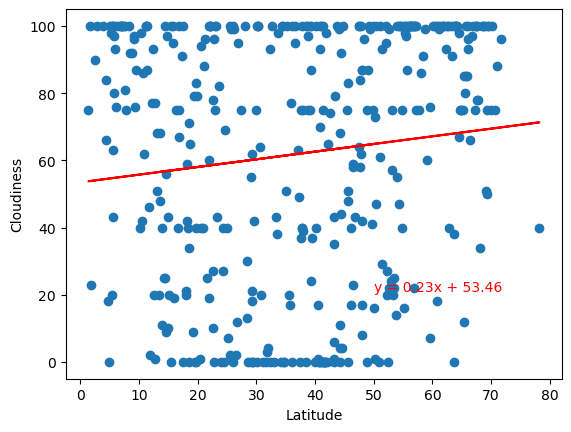

In [20]:
# Northern Hemisphere
regress_values, line_eq, rvalue = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (50, 21), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")

The r-value is: 0.03840830497006631


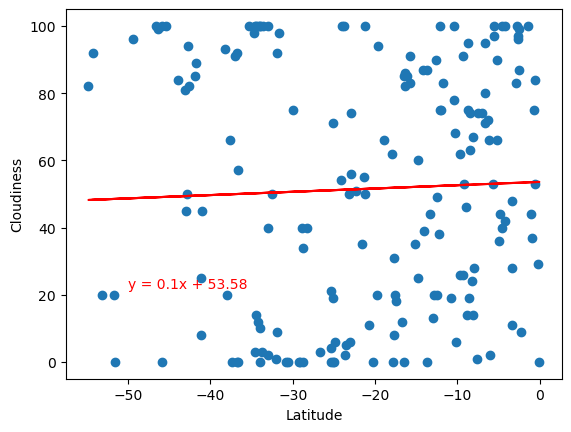

In [21]:
# Southern Hemisphere
regress_values, line_eq, rvalue = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 22), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

The relationship between latitude in the northern hemisphere and cloudiness is very weak and negative.
Similarly, the relationship between latitude in the southern hemisphere and cloudiness is also very weak 
and negative.

Looking at how the datapoints don't coincide with the linear regresssion in both the northern and southern hemisphere
and the weakness of the relationships, it can be assumed that latitude does not have a significant impact on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.23810250894181054


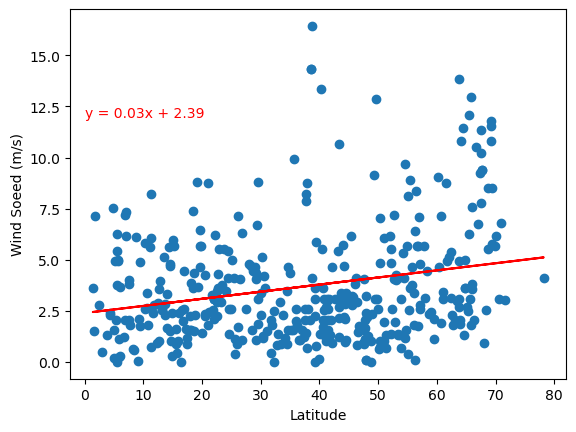

In [22]:
# Northern Hemisphere
regress_values, line_eq, rvalue = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 12), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Soeed (m/s)")
print(f"The r-value is: {rvalue}")

The r-value is: -0.22736369337798726


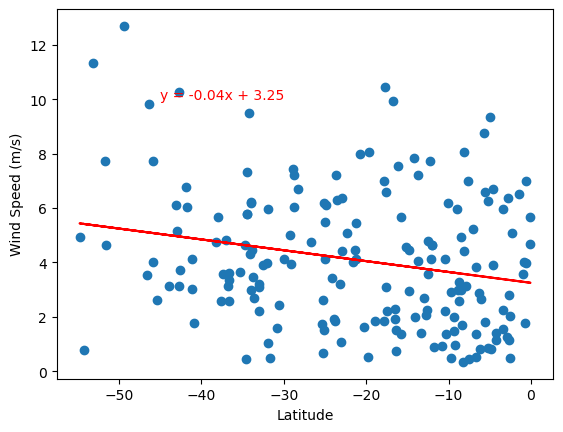

In [23]:
# Southern Hemisphere
regress_values, line_eq, rvalue = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-45, 10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

The relationship between latitude in the northern hemisphere and windspeed is very weak and positive.
In addition, the relationship between latitude in the southern hemisphere and cloudiness is very weak 
and negative.

Looking at how the datapoints don't coincide quite well with the linear regresssion in both the northern and southern
hemisphere and the weakness of the relationships, it can be assumed that latitude does not have a major impact on 
windspeed. However, it should be noted that windspeed tends to be slower in cities near the Equator, and pick up in cities closer to the Poles.